Number of duplicated data arrays 708
Parameters of the data
--------------------------------------------
Total number of cases are 33622
Number of Non-fraud cases are 33588
Number of Non-fraud cases are 34
Percentage of fraud cases is 0.1 %
--------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Akshil\AppData\Local\Temp\ipykernel_2044\3435820128.py:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([min(amount_val), max(amount_val)])


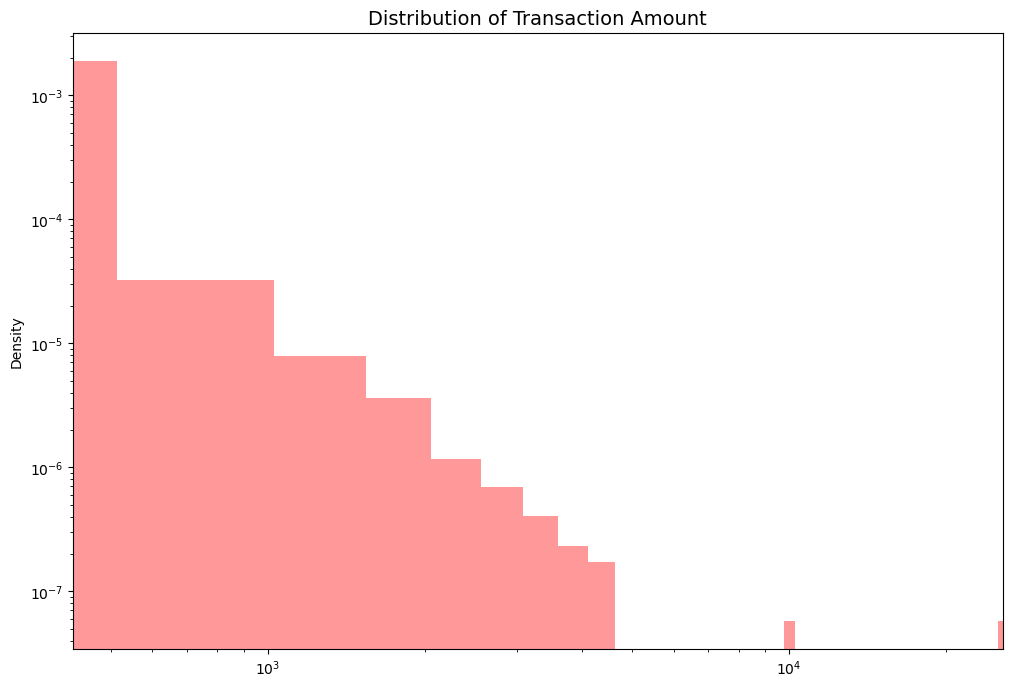

Data statistics
--------------------------------------------
Non-fraud stats
count    33588.000000
mean        73.416886
std        242.170600
min          0.000000
25%          4.490000
50%         17.000000
75%         60.000000
max      25691.160000
Name: Amount, dtype: float64
--------------------------------------------
Fraud stats
count     34.000000
mean      82.391176
std      144.759923
min        0.000000
25%        0.770000
50%        7.325000
75%       90.587500
max      634.300000
Name: Amount, dtype: float64
--------------------------------------------
Decision tree running
KNN running


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic regression running
SVM running
Random forest tree running
XGBoost running
Accuracy of each test
------------------------------------------------------------------------
Decision Tree model is  0.9989591078066915
------------------------------------------------------------------------
KNN model is  0.9992565055762082
------------------------------------------------------------------------
Logistic Regression model is  0.9998513011152417
------------------------------------------------------------------------
SVM model is  0.9992565055762082
------------------------------------------------------------------------
Random Forest Tree model  0.9992565055762082
------------------------------------------------------------------------
XGBoost model is  0.9995539033457249
------------------------------------------------------------------------
F1 SCORE
------------------------------------------------------------------------
Decision Tree model is  0.4615384615384615
-------------------

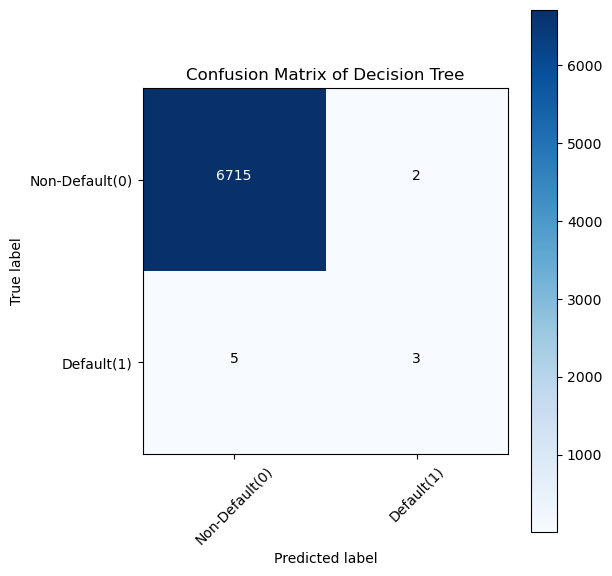

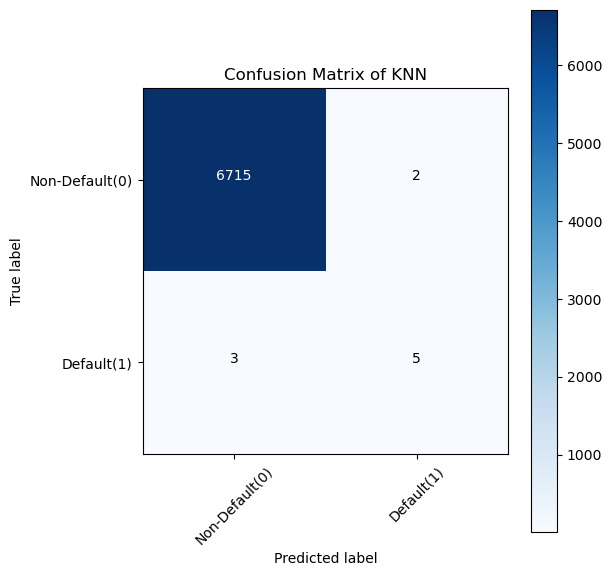

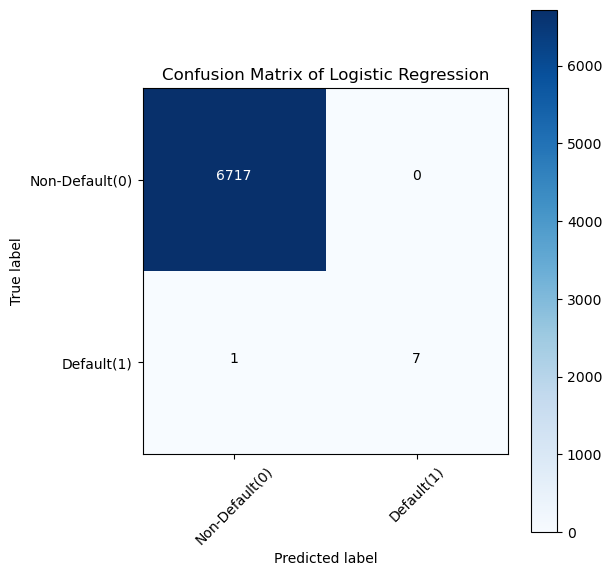

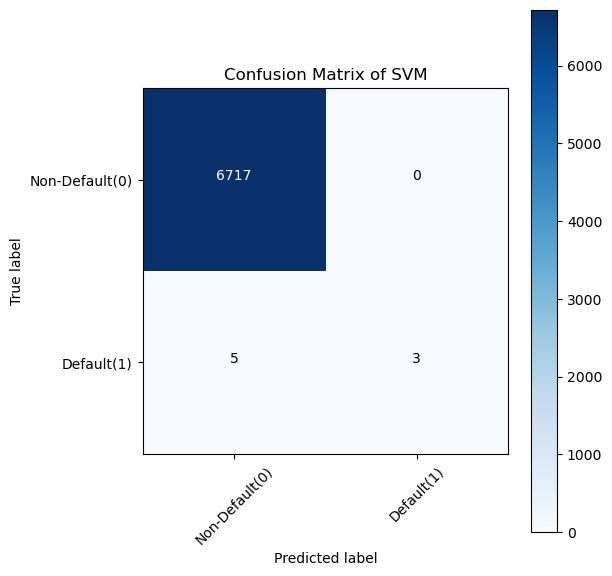

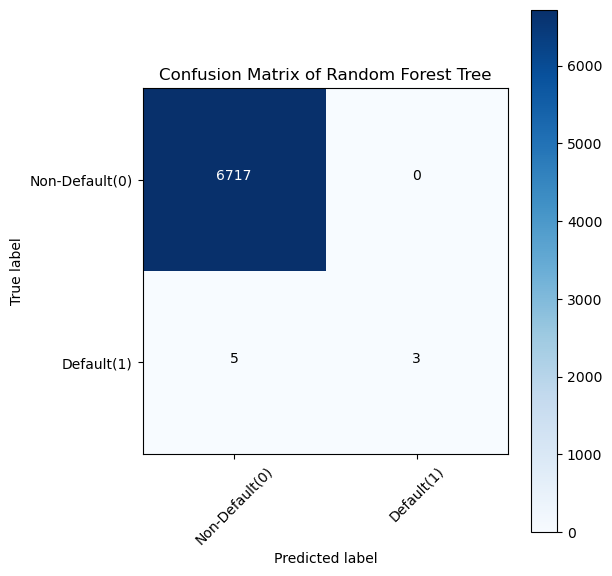

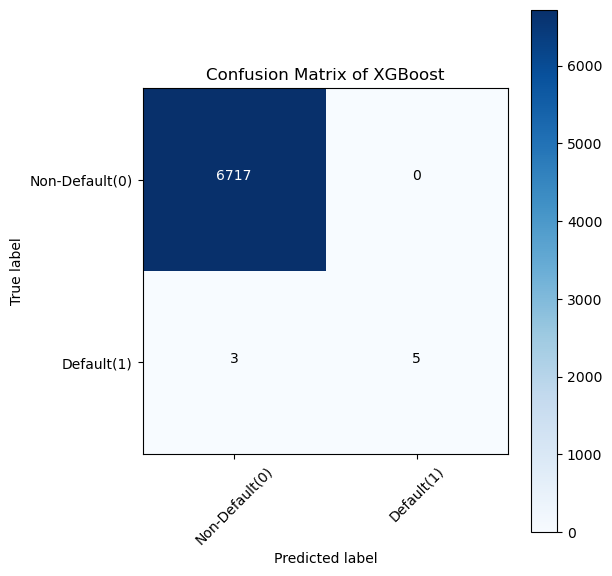

In [2]:

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import itertools # advanced tools
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

def conf_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

df = pd.read_csv('creditcard.csv')
df = df.iloc[250000:]

#drop time variable (not relevant) and duplicated data
df.drop('Time', axis = 1, inplace = True)

print('Number of duplicated data arrays', df.duplicated().sum())

df.drop_duplicates(keep=False,inplace=True)

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Parameters of the data')
print('--------------------------------------------')
print('Total number of cases are', cases)
print('Number of Non-fraud cases are', nonfraud_count)
print('Number of Non-fraud cases are',fraud_count)
print('Percentage of fraud cases is' ,fraud_percentage , '%')
print('--------------------------------------------')

"NB: fraud/nonfraud ratio is only 0.17%"

#Plot amount histogram
amount_val = df['Amount'].values

fig, ax = plt.subplots(1, 1, figsize=(12,8))

amount_val = df['Amount'].values
plt.yscale("log")
plt.xscale("log")
sns.distplot(amount_val, ax=ax, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=14)
ax.set_xlim([min(amount_val), max(amount_val)])
plt.savefig('amount.png')
plt.show()


nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print("Data statistics")
print('--------------------------------------------')
print('Non-fraud stats')
print(nonfraud_cases.Amount.describe())
print('--------------------------------------------')
print('Fraud stats')
print(fraud_cases.Amount.describe())
print('--------------------------------------------')

#%%
"DATA SPLIT"

Vs = df.drop('Class', axis = 1).values #Vs vsalues
y = df['Class'].values #Fraud/non-fraud array

normalise = True

if normalise:
    # print('First few values BEFORE normalisation') 
    # print(Vs[0:5,-1])
    plt.show()
    Vs[:,-1] = Vs[:,-1]/np.linalg.norm(Vs[:,-1])
    # print('First few values AFTER normalisation')
    # print(Vs[0:5,-1])
    plt.show()
    
testtotrain = 0.2
X_train, X_test, y_train, y_test = train_test_split(Vs, y, test_size = testtotrain, random_state = 0)


# MODELING

# 1. Decision Tree
print("Decision tree running")
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5
print("KNN running")
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression
print("Logistic regression running")
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)


# 4. SVM 
print("SVM running")
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree
print("Random forest tree running")
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost
print("XGBoost running")
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

#%%
# EVALUATION

#%% ACCURACY SCORE

"""Accuracy score: this is simply the success ratio of the model 
(correct predictions / total predictions)"""

print('Accuracy of each test')
print('------------------------------------------------------------------------')
print('Decision Tree model is ', accuracy_score(y_test, tree_yhat))
print('------------------------------------------------------------------------')
print('KNN model is ',accuracy_score(y_test, knn_yhat))
print('------------------------------------------------------------------------')
print('Logistic Regression model is ', accuracy_score(y_test, lr_yhat))
print('------------------------------------------------------------------------')
print('SVM model is ',accuracy_score(y_test, svm_yhat))
print('------------------------------------------------------------------------')
print('Random Forest Tree model ', accuracy_score(y_test, rf_yhat))
print('------------------------------------------------------------------------')
print('XGBoost model is ',accuracy_score(y_test, xgb_yhat))
print('------------------------------------------------------------------------')

#%% F1 SCORE
"""F1 score: mean of the precission but including the recall 
(2( (precision * recall) / (precision + recall)))
NB: for our purpose, we would like to prioritise highest recall (we don't want to miss any fraudulent transactions)"""

print('F1 SCORE')
print('------------------------------------------------------------------------')
print('Decision Tree model is ', f1_score(y_test, tree_yhat))
print('------------------------------------------------------------------------')
print('KNN model is ',f1_score(y_test, knn_yhat))
print('------------------------------------------------------------------------')
print('Logistic Regression model is ', f1_score(y_test, lr_yhat))
print('------------------------------------------------------------------------')
print('SVM model is ',f1_score(y_test, svm_yhat))
print('------------------------------------------------------------------------')
print('Random Forest Tree model ', f1_score(y_test, rf_yhat))
print('------------------------------------------------------------------------')
print('XGBoost model is ',f1_score(y_test, xgb_yhat))
print('------------------------------------------------------------------------')

#%% CONFUSION MATRIX
"""Confusion Matrix: lets us visualise the number of right/wrong classifications,
which is useful for our """

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost


# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = conf_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('1.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = conf_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('2.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = conf_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('3.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = conf_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('4.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = conf_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('5.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = conf_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('6.png')
plt.show()